In [141]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install nltk
!pip install texblob
!pip install pandas emoji
!pip install emot
!pip install textblob
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement texblob (from versions: none)
ERROR: No matching distribution found for texblob

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 393.8 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/300.2 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [353]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srisa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srisa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\srisa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [354]:
data=pd.read_csv("zomato_reviews.csv")

In [355]:
data.head()

,Unnamed: 0,rating,review
0,0,5,nice
1,1,5,"best biryani , so supportive staff of outlet ,..."
2,2,4,delivery boy was very decent and supportive.👌👍
3,3,1,"worst biryani i have tasted in my life, half o..."
4,4,5,all food is good and tasty . will order again ...


In [356]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [357]:
data.shape

(5479, 2)

In [358]:
data.isnull().sum()

rating    0
review    1
dtype: int64

In [359]:
data=data.dropna()

In [360]:
data.isnull().sum()

rating    0
review    0
dtype: int64

In [361]:
data["rating"].unique()

array([5, 4, 1, 3, 2], dtype=int64)

In [362]:
rating_counts=data['rating'].value_counts().sort_index()

In [363]:
rating_counts

rating
1    1891
2     368
3     474
4     457
5    2288
Name: count, dtype: int64

In [364]:
my_labels=[f'Rating{i}'for i in rating_counts.index]
values=rating_counts.values

In [365]:
values

array([1891,  368,  474,  457, 2288], dtype=int64)

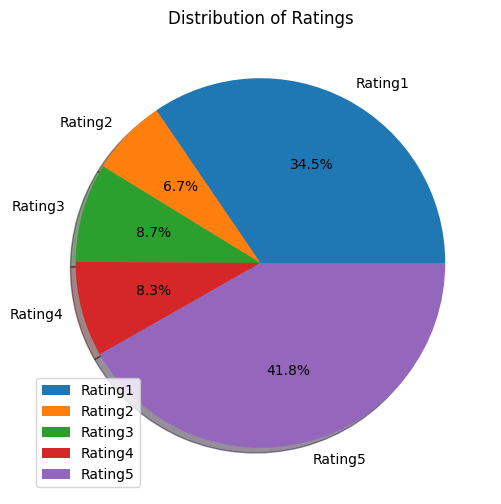

In [366]:
plt.figure(figsize=(10,6))
plt.pie(values,labels=my_labels,autopct='%1.1f%%',shadow=True)
plt.legend()
plt.title("Distribution of Ratings")
plt.show()

In [367]:
import emoji

In [368]:
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')
    
def remove_emoticons(text):
    emoticon_pattern = r'(?::|;|=)(?:-)?(?:\)|\(|D|P)'
    return re.sub(emoticon_pattern, '', text)

In [369]:
def Text_Cleaning(Text):
    Text = Text.lower() 
    # Remove punctuation
    punc = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    Text = Text.translate(punc)
    # Remove digits
    Text = re.sub(r'\d', '', Text) 
    # Remove URLs
    Text = re.sub('https?://\S+|www\.\S+', '', Text) 
    # Remove newline characters
    Text = re.sub('\n', '', Text)
    # Remove emojis
    Text = remove_emojis(Text)
    # Remove emoticons
    Text = remove_emoticons(Text)
    
    return Text



In [370]:
Stopwords=stopwords.words('english')
def Text_Processing(Text):
    Processed_Text=list()
    Lemmatizer=WordNetLemmatizer()
    Tokens=nltk.word_tokenize(Text)
    for word in Tokens:
        if word not in Stopwords:
            Processed_Text.append(Lemmatizer.lemmatize(word))
    return(" ".join(Processed_Text))

In [371]:
data["cleaned_review"]=data["review"].apply(lambda Text: Text_Processing(Text))
data["cleaned_review"]=data["review"].apply(lambda Text: Text_Cleaning(Text))

In [372]:
data.head()

,rating,review,cleaned_review
0,5,nice,nice
1,5,"best biryani , so supportive staff of outlet ,...",best biryani so supportive staff of outlet ...
2,4,delivery boy was very decent and supportive.👌👍,delivery boy was very decent and supportive
3,1,"worst biryani i have tasted in my life, half o...",worst biryani i have tasted in my life half o...
4,5,all food is good and tasty . will order again ...,all food is good and tasty will order again ...


In [373]:
def Labelling(Rows):
    if(Rows["rating"]>3.0):
        Label="Positive"
    elif(Rows["rating"]<3.0):
        Label="Negative"
    else:
        Label="Neutral"
    return Label    
data["sentiment"]=data.apply(Labelling,axis=1)

In [374]:
data.head()

,rating,review,cleaned_review,sentiment
0,5,nice,nice,Positive
1,5,"best biryani , so supportive staff of outlet ,...",best biryani so supportive staff of outlet ...,Positive
2,4,delivery boy was very decent and supportive.👌👍,delivery boy was very decent and supportive,Positive
3,1,"worst biryani i have tasted in my life, half o...",worst biryani i have tasted in my life half o...,Negative
4,5,all food is good and tasty . will order again ...,all food is good and tasty will order again ...,Positive


In [375]:
sentiment_counts=data["sentiment"].value_counts()

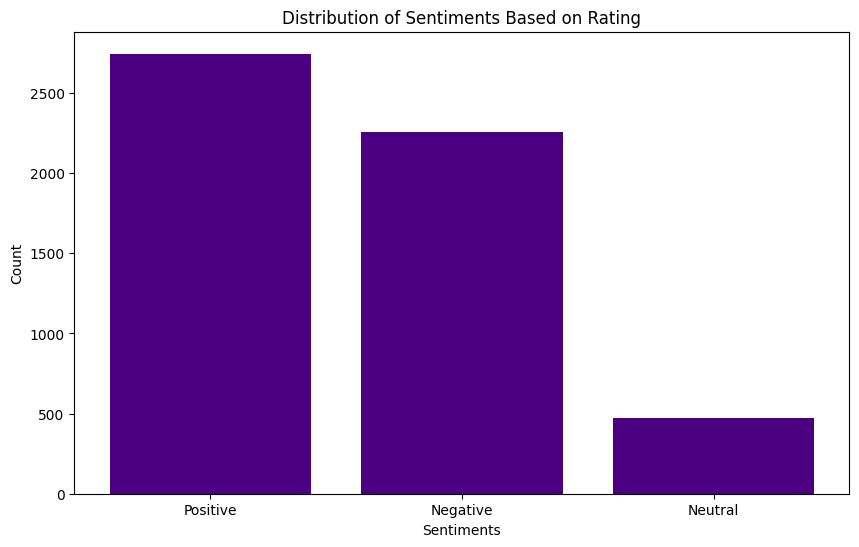

In [376]:
plt.figure(figsize=(10,6))
plt.bar(sentiment_counts.index,sentiment_counts.values,color="indigo")
plt.title("Distribution of Sentiments Based on Rating")
plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.show()

In [377]:
data["polarity"]=data["cleaned_review"].map(lambda Text: TextBlob(Text).sentiment.polarity)

In [378]:
data.head()

,rating,review,cleaned_review,sentiment,polarity
0,5,nice,nice,Positive,0.600000
1,5,"best biryani , so supportive staff of outlet ,...",best biryani so supportive staff of outlet ...,Positive,0.616667
2,4,delivery boy was very decent and supportive.👌👍,delivery boy was very decent and supportive,Positive,0.358333
3,1,"worst biryani i have tasted in my life, half o...",worst biryani i have tasted in my life half o...,Negative,-0.583333
4,5,all food is good and tasty . will order again ...,all food is good and tasty will order again ...,Positive,0.600000


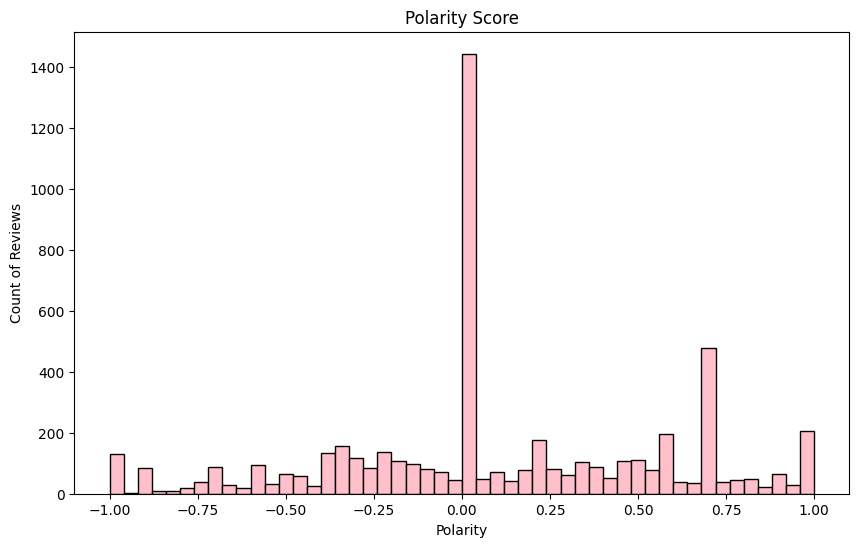

In [379]:
plt.figure(figsize=(10,6))
plt.hist(data["polarity"],bins=50,color="pink",linewidth=1,edgecolor="black")
plt.xlabel("Polarity")
plt.ylabel("Count of Reviews")
plt.title("Polarity Score")
plt.show()

In [380]:
data["word_counts"]=data["cleaned_review"].apply(lambda x: len(str(x).split()))

In [381]:
data.head()

,rating,review,cleaned_review,sentiment,polarity,word_counts
0,5,nice,nice,Positive,0.600000,1
1,5,"best biryani , so supportive staff of outlet ,...",best biryani so supportive staff of outlet ...,Positive,0.616667,18
2,4,delivery boy was very decent and supportive.👌👍,delivery boy was very decent and supportive,Positive,0.358333,7
3,1,"worst biryani i have tasted in my life, half o...",worst biryani i have tasted in my life half o...,Negative,-0.583333,15
4,5,all food is good and tasty . will order again ...,all food is good and tasty will order again ...,Positive,0.600000,18


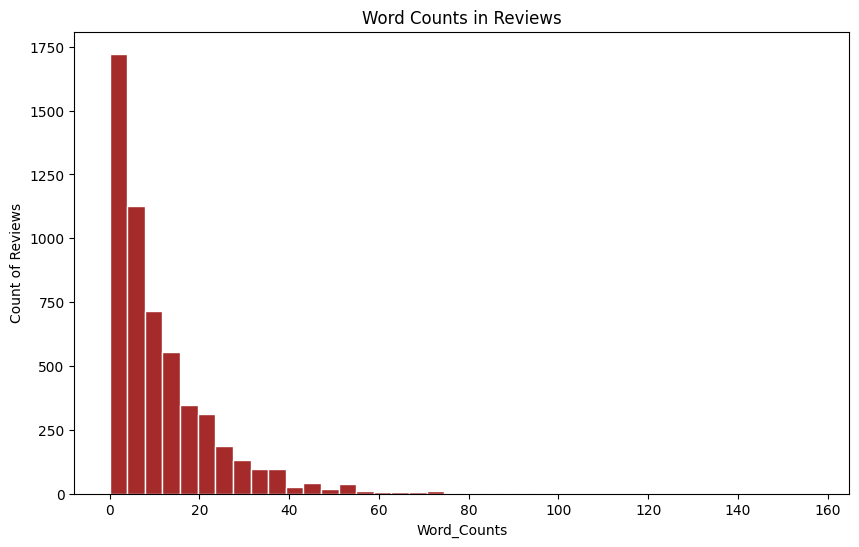

In [382]:
plt.figure(figsize=(10,6))
plt.hist(data["word_counts"],bins=40,color="brown",linewidth=1,edgecolor="white")
plt.xlabel("Word_Counts")
plt.ylabel("Count of Reviews")
plt.title("Word Counts in Reviews")
plt.show()

In [383]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [384]:
def Gram_Analysis(Corpus,Gram,N):
    Vectorizer=CountVectorizer(stop_words=Stopwords,ngram_range=(Gram,Gram))
    ngrams=Vectorizer.fit_transform(Corpus)
    Count=ngrams.sum(axis=0)
    words=[(word,Count[0,idx]) for word,idx in Vectorizer.vocabulary_.items()]
    words=sorted(words,key=lambda x:x[1],reverse=True)
    return words[:N]

In [385]:
Positive=data[data["sentiment"]=="Positive"].dropna()
Negative=data[data["sentiment"]=="Negative"].dropna()
Neutral=data[data["sentiment"]=="Neutral"].dropna()

In [406]:
words=Gram_Analysis(Positive["cleaned_review"],1,30)
Unigram_pos=pd.DataFrame(words,columns=["Words","Counts"])
Unigram_pos=Unigram_pos.groupby("Words").sum()["Counts"].sort_values()

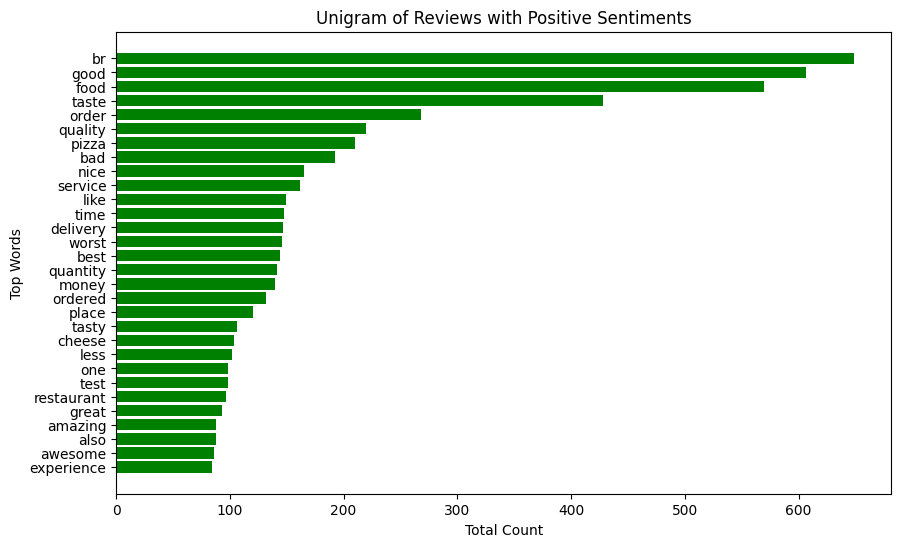

In [407]:
plt.figure(figsize=(10,6))
plt.barh(Unigram_pos.index,Unigram_pos,color="green")
plt.title("Unigram of Reviews with Positive Sentiments")
plt.xlabel("Total Count")
plt.ylabel("Top Words")
plt.show()

In [408]:
words=Gram_Analysis(Neutral["cleaned_review"],1,30)
Unigram_neu=pd.DataFrame(words,columns=["Words","Counts"])
Unigram_neu=Unigram_neu.groupby("Words").sum()["Counts"].sort_values()

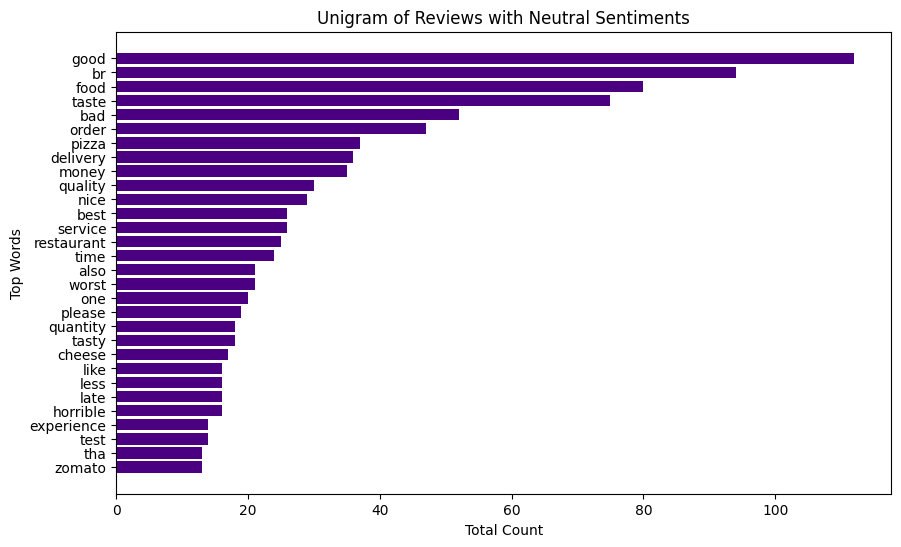

In [409]:
plt.figure(figsize=(10,6))
plt.barh(Unigram_neu.index,Unigram_neu,color="indigo")
plt.title("Unigram of Reviews with Neutral Sentiments")
plt.xlabel("Total Count")
plt.ylabel("Top Words")
plt.show()

In [410]:
words=Gram_Analysis(Negative["cleaned_review"],1,30)
Unigram_neg=pd.DataFrame(words,columns=["Words","Counts"])
Unigram_neg=Unigram_neg.groupby("Words").sum()["Counts"].sort_values()

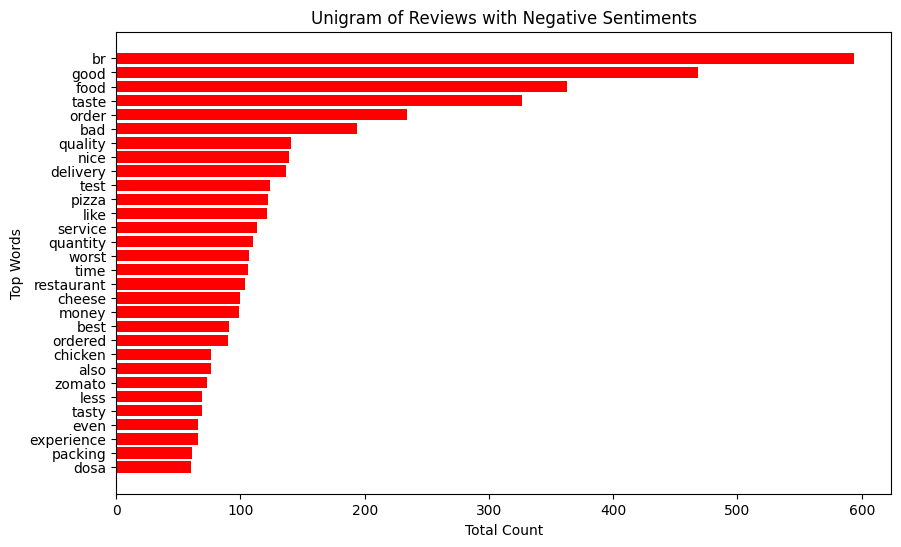

In [411]:
plt.figure(figsize=(10,6))
plt.barh(Unigram_neg.index,Unigram_neg,color="red")
plt.title("Unigram of Reviews with Negative Sentiments")
plt.xlabel("Total Count")
plt.ylabel("Top Words")
plt.show()

In [412]:
words=Gram_Analysis(Positive["cleaned_review"],2,30)
Bigram_pos=pd.DataFrame(words,columns=["Words","Counts"])
Bigram_pos=Bigram_pos.groupby("Words").sum()["Counts"].sort_values()

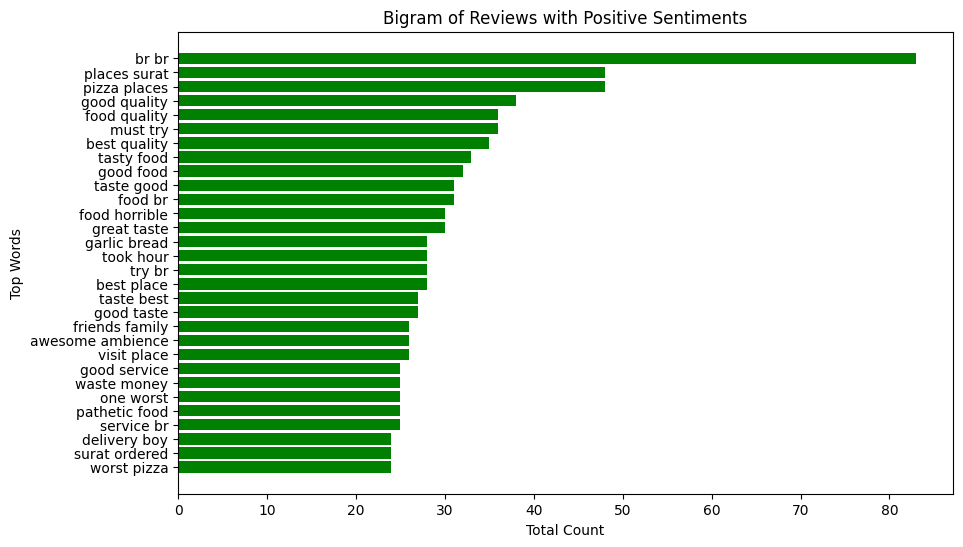

In [413]:
plt.figure(figsize=(10,6))
plt.barh(Bigram_pos.index,Bigram_pos,color="green")
plt.title("Bigram of Reviews with Positive Sentiments")
plt.xlabel("Total Count")
plt.ylabel("Top Words")
plt.show()

In [414]:
words=Gram_Analysis(Neutral["cleaned_review"],2,30)
Bigram_neu=pd.DataFrame(words,columns=["Words","Counts"])
Bigram_neu=Bigram_neu.groupby("Words").sum()["Counts"].sort_values()

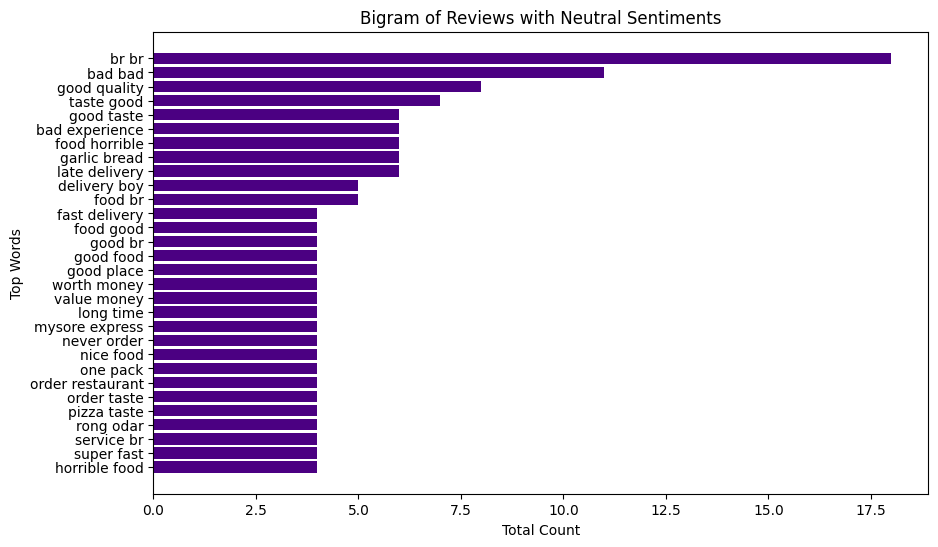

In [415]:
plt.figure(figsize=(10,6))
plt.barh(Bigram_neu.index,Bigram_neu,color="indigo")
plt.title("Bigram of Reviews with Neutral Sentiments")
plt.xlabel("Total Count")
plt.ylabel("Top Words")
plt.show()

In [416]:
words=Gram_Analysis(Negative["cleaned_review"],2,30)
Bigram_neg=pd.DataFrame(words,columns=["Words","Counts"])
Bigram_neg=Bigram_neg.groupby("Words").sum()["Counts"].sort_values()

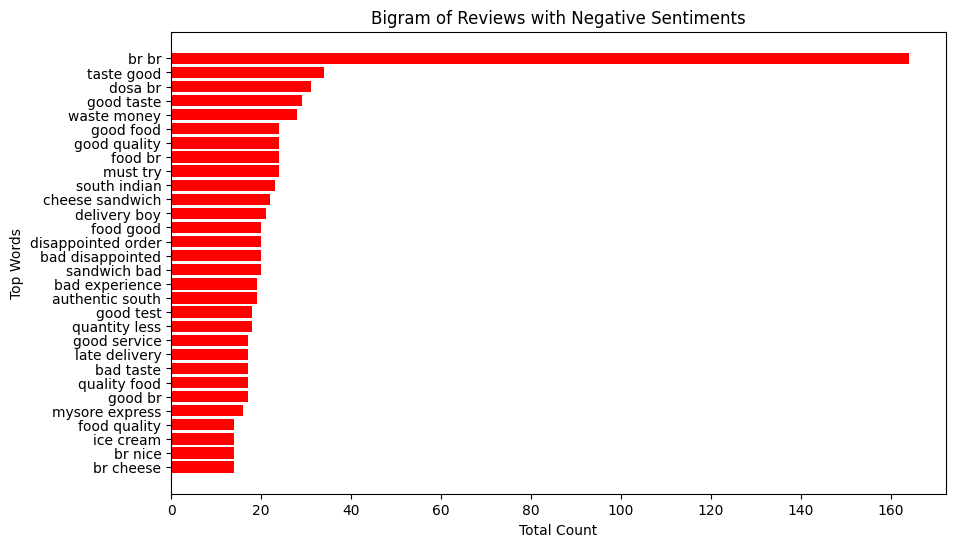

In [417]:
plt.figure(figsize=(10,6))
plt.barh(Bigram_neg.index,Bigram_neg,color="red")
plt.title("Bigram of Reviews with Negative Sentiments")
plt.xlabel("Total Count")
plt.ylabel("Top Words")
plt.show()

In [398]:
words=Gram_Analysis(Positive["cleaned_review"],3,30)
Trigram_pos=pd.DataFrame(words,columns=["Words","Counts"])
Trigram_pos=Trigram_pos.groupby("Words").sum()["Counts"].sort_values()

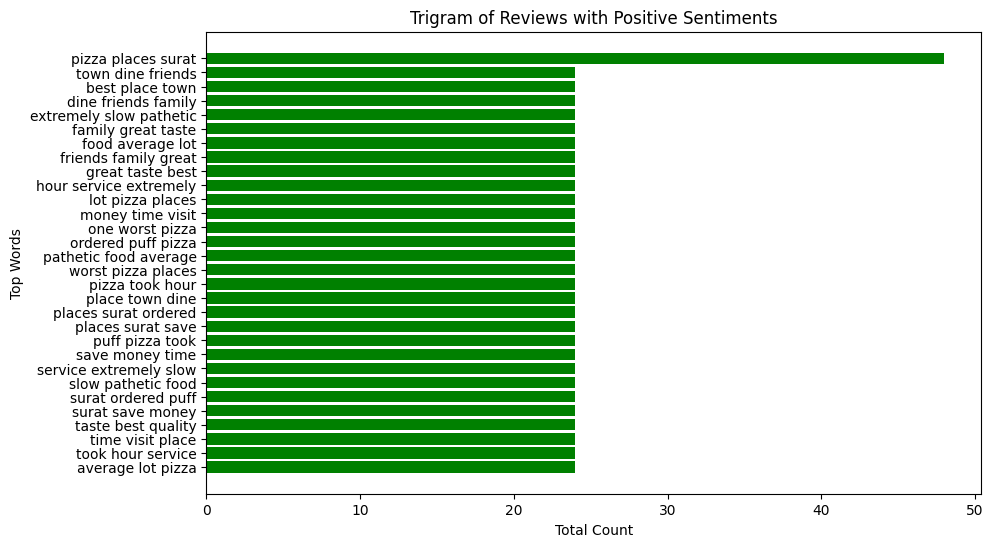

In [399]:
plt.figure(figsize=(10,6))
plt.barh(Trigram_pos.index,Trigram_pos,color="green")
plt.title("Trigram of Reviews with Positive Sentiments")
plt.xlabel("Total Count")
plt.ylabel("Top Words")
plt.show()

In [400]:
words=Gram_Analysis(Neutral["cleaned_review"],3,30)
Trigram_neu=pd.DataFrame(words,columns=["Words","Counts"])
Trigram_neu=Trigram_neu.groupby("Words").sum()["Counts"].sort_values()

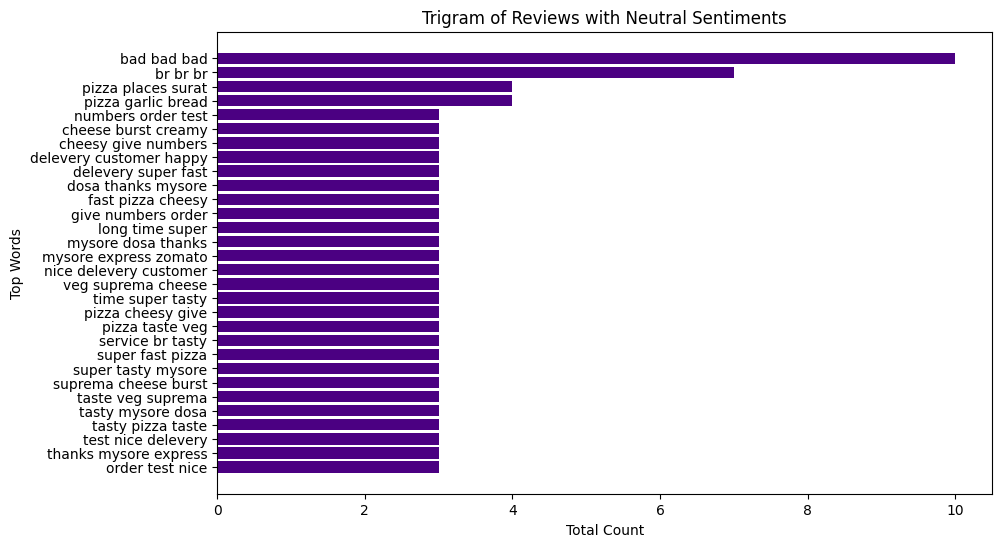

In [401]:
plt.figure(figsize=(10,6))
plt.barh(Trigram_neu.index,Trigram_neu,color="indigo")
plt.title("Trigram of Reviews with Neutral Sentiments")
plt.xlabel("Total Count")
plt.ylabel("Top Words")
plt.show()

In [402]:
words=Gram_Analysis(Negative["cleaned_review"],3,30)
Trigram_neg=pd.DataFrame(words,columns=["Words","Counts"])
Trigram_neg=Trigram_neg.groupby("Words").sum()["Counts"].sort_values()

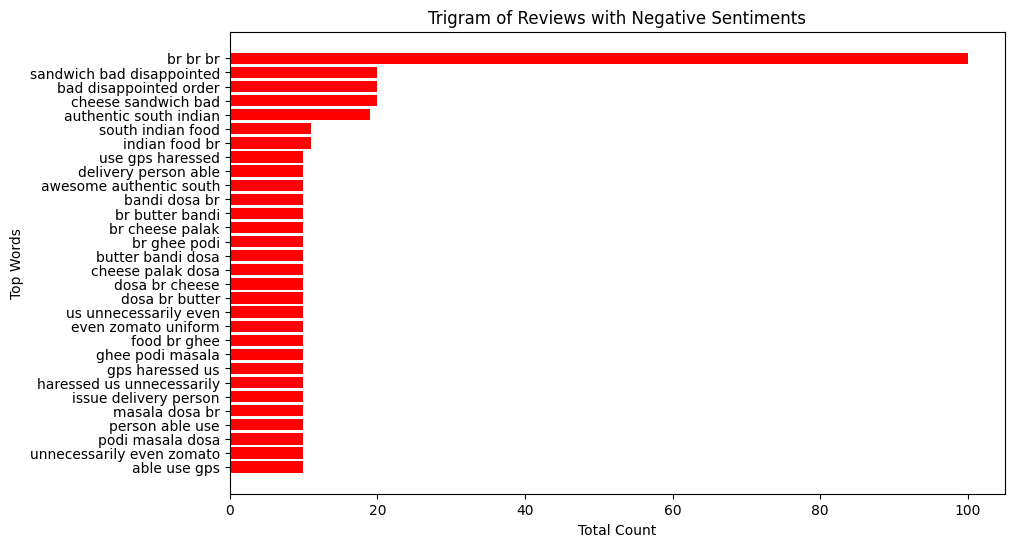

In [403]:
plt.figure(figsize=(10,6))
plt.barh(Trigram_neg.index,Trigram_neg,color="red")
plt.title("Trigram of Reviews with Negative Sentiments")
plt.xlabel("Total Count")
plt.ylabel("Top Words")
plt.show()

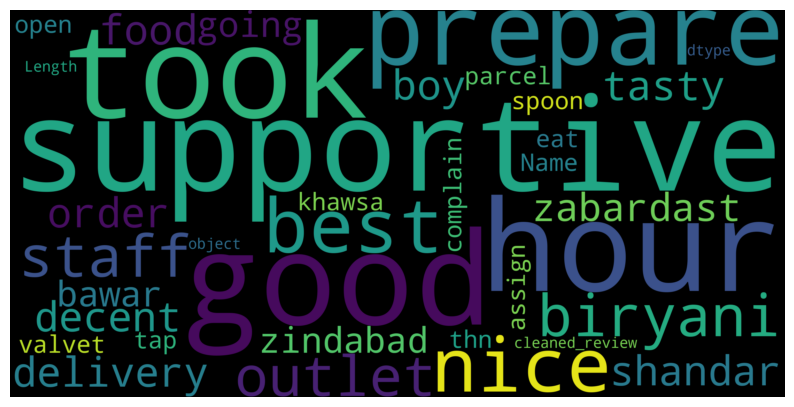

In [405]:
wordcloud=WordCloud(max_words=50,width=3000,height=1500,stopwords=Stopwords).generate(str(Positive["cleaned_review"]))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

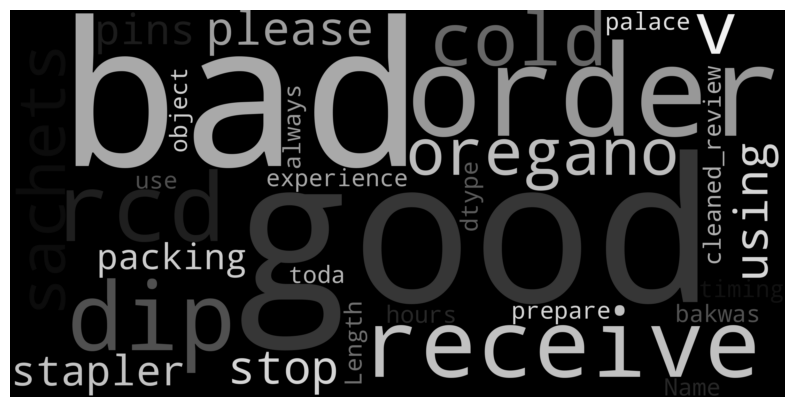

In [420]:
wordcloud=WordCloud(max_words=50,width=3000,height=1500,stopwords=Stopwords,colormap='gray').generate(str(Neutral["cleaned_review"]))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

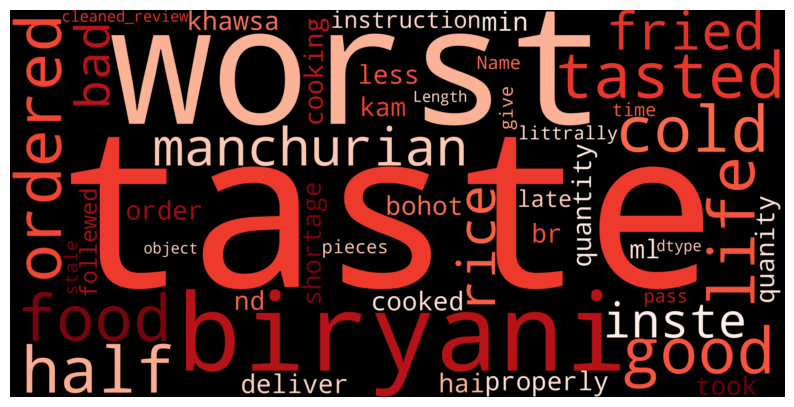

In [423]:
wordcloud=WordCloud(max_words=50,width=3000,height=1500,stopwords=Stopwords,colormap="Reds").generate(str(Negative["cleaned_review"]))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()